In [5]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [6]:
from keras.datasets import mnist

In [7]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [8]:
print('train data=', len(x_train_image))
print('test data=', len(x_test_image))

train data= 60000
test data= 10000


In [9]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [10]:
print('x_test_image:', x_test_image.shape)
print('y_test_label:', y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


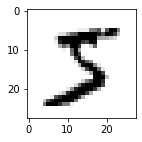

5

In [11]:
import matplotlib.pyplot as plt

def plot_image(image):
    fig = plt.gcf() 
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
plot_image(x_train_image[0])
y_train_label[0]

In [12]:
def plot_images_labels_prediction(images, labels,
                                 prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction)>0:
            title += ",predict=" + str(prediction[idx])
    
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

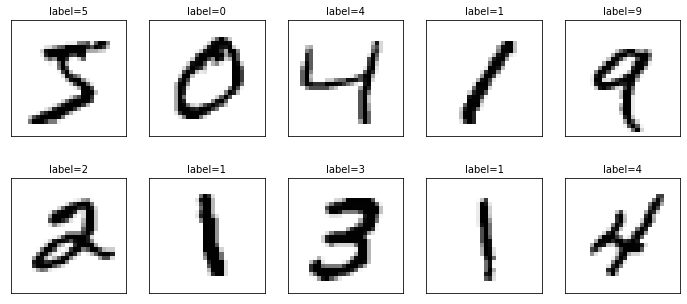

In [13]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, num=10)

In [14]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [15]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [16]:
print('x_Train:', x_Train.shape)
print('x_Test:', x_Test.shape)

x_Train: (60000, 784)
x_Test: (10000, 784)


In [17]:
x_test_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [19]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)